In [67]:
import pickle
import numpy as np
from numpy import linalg as LA
from cossim import build_cossim
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import re
import json

In [68]:
lyrics = pickle.load(open("broadway_lyrics_v5.pkl", "rb"))

In [69]:
lyrics.keys()

dict_keys(['Class Act, A', 'Jekyll & Hyde', 'Mary Poppins', 'Secret Garden, The', 'Miss Liberty', 'Love Never Dies', 'Very Potter Sequel, A', 'American in Paris, An', 'School of Rock', 'Wedding Singer', 'Reefer Madness', 'Snow White And The Seven Dwarfs', '110 in the Shade', 'Seven Brides For Seven Brothers', 'Godspell', 'Avenue Q', 'Bernarda Alba', 'Redhead', 'Lestat', 'Mame', 'High School Musical', 'American Idiot', 'Floyd Collins', 'King and I, The', 'Little Fish', 'Passing Strange', 'Title Of Show', 'Little Night Music', 'Sunday in the Park With George', '25th Annual Putnam County Spelling Bee', '42nd Street', 'Lone Star Love', 'Golden Boy', 'Glorious Ones, The', 'Anna Karenina', 'Cinderella: Songs from the Classic Fairy Tale', 'Pocahontas', 'Bajour', 'Footloose', 'Do I Hear A Waltz?', 'Busker Alley', 'Color Purple, The', 'Wiz, The', 'Once Upon A Mattress', 'Seesaw', 'Pipe Dream', 'Sunset Boulevard', 'Love Online', 'Mr. Mark Twain', 'Just So', 'Pacific Overtures', 'Gentlemen Prefer

In [70]:
lyrics["Frozen"]

{'composer': 'Kristen Anderson-Lopez and Robert Lopez',
 'currently_playing': True,
 'description': 'Forget girl power, sisterly love and the high-belt clarion call of “Let It Go.” Anxiety over the handling of a precious gift is the theme that comes through loudest in “Frozen,” the sometimes rousing, often dull, alternately dopey and anguished Disney musical that opened on Broadway on Thursday. The precious gift is not, I hasten to add, the freeze-ray of Queen Elsa, which threatens her kingdom without any corresponding benefits. (Couldn’t they at least hook her up to a gelato machine?) Nor is it the warmheartedness of her sister, Anna, which puts her at constant risk of unelective cryogenesis. No, the precious gift causing so much anxiety at the St. James Theater is the 2013 blockbuster film from which the stage musical has been adapted. After all, $1.3 billion in box office is a lot of ice. In ways that are both successful and not, you can feel the director, Michael Grandage, and his 

In [71]:
# get TF-IDF of lyrics

d = {}
for show in lyrics:
    S = ""
    for line in lyrics[show]["lyrics"]:
        S += " " + line
    d[show] = S
    
tfidf_vec = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
doc_by_vocab = tfidf_vec.fit_transform([d[i] for i in d]).toarray()
index_to_vocab = {i:v for i, v in enumerate(tfidf_vec.get_feature_names())}

In [72]:
musical_name_to_index = {musical:index for index, musical in enumerate(lyrics.keys())}

In [73]:
doc_by_vocab[214]

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
musical_name_to_index["Mamma Mia!"]

228

In [75]:
normboy = np.apply_along_axis(LA.norm,1,doc_by_vocab)

In [76]:
musical_index_to_name = {value:key for key,value in musical_name_to_index.items()}

In [77]:
cosmat = build_cossim(doc_by_vocab)

C:\Users\AChatt10\OneDrive\Arjun\School\2018-19 (Sem2)\CS 4300\cs4300sp2019-jp2254-nmd65-bdg74-ac2582-srm276\cossim.py:17: RuntimeWarning: invalid value encountered in true_divide
  intermediate = np.divide(dot,norms)
C:\Users\AChatt10\OneDrive\Arjun\School\2018-19 (Sem2)\CS 4300\cs4300sp2019-jp2254-nmd65-bdg74-ac2582-srm276\cossim.py:18: RuntimeWarning: invalid value encountered in true_divide
  sim_mat = np.divide(np.transpose(intermediate),norms)


In [78]:
np.sum(np.isnan(cosmat),axis=1)

array([ 40,  40,  40,  40,  40, 472,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40, 472,  40,  40,  40,  40,  40,  40, 472,  40,  40,
        40,  40,  40, 472,  40,  40,  40,  40,  40,  40,  40,  40,  40,
       472, 472,  40, 472, 472,  40,  40,  40,  40,  40,  40,  40,  40,
        40, 472,  40,  40,  40,  40,  40,  40, 472,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
       472, 472,  40,  40,  40,  40,  40, 472,  40, 472,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40,
        40,  40,  40,  40,  40,  40, 472,  40,  40,  40,  40,  40,  40,
        40,  40, 472,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40, 472,  40,  40,  40,  40,  40,  40,  4

In [79]:
musical_index_to_name

{0: 'Class Act, A',
 1: 'Jekyll & Hyde',
 2: 'Mary Poppins',
 3: 'Secret Garden, The',
 4: 'Miss Liberty',
 5: 'Love Never Dies',
 6: 'Very Potter Sequel, A',
 7: 'American in Paris, An',
 8: 'School of Rock',
 9: 'Wedding Singer',
 10: 'Reefer Madness',
 11: 'Snow White And The Seven Dwarfs',
 12: '110 in the Shade',
 13: 'Seven Brides For Seven Brothers',
 14: 'Godspell',
 15: 'Avenue Q',
 16: 'Bernarda Alba',
 17: 'Redhead',
 18: 'Lestat',
 19: 'Mame',
 20: 'High School Musical',
 21: 'American Idiot',
 22: 'Floyd Collins',
 23: 'King and I, The',
 24: 'Little Fish',
 25: 'Passing Strange',
 26: 'Title Of Show',
 27: 'Little Night Music',
 28: 'Sunday in the Park With George',
 29: '25th Annual Putnam County Spelling Bee',
 30: '42nd Street',
 31: 'Lone Star Love',
 32: 'Golden Boy',
 33: 'Glorious Ones, The',
 34: 'Anna Karenina',
 35: 'Cinderella: Songs from the Classic Fairy Tale',
 36: 'Pocahontas',
 37: 'Bajour',
 38: 'Footloose',
 39: 'Do I Hear A Waltz?',
 40: 'Busker Alley',

In [80]:
cosmat

array([[1.        , 0.07627419, 0.0316403 , ..., 0.03706033, 0.04135115,
        0.09200374],
       [0.07627419, 1.        , 0.05226996, ..., 0.07484767, 0.13175811,
        0.06903476],
       [0.0316403 , 0.05226996, 1.        , ..., 0.03234955, 0.07814725,
        0.14498771],
       ...,
       [0.03706033, 0.07484767, 0.03234955, ..., 1.        , 0.06328336,
        0.07434   ],
       [0.04135115, 0.13175811, 0.07814725, ..., 0.06328336, 1.        ,
        0.05065908],
       [0.09200374, 0.06903476, 0.14498771, ..., 0.07434   , 0.05065908,
        1.        ]])

In [81]:
def get_sim(mus_1, mus_2, sim_mat = cosmat, name_to_index = musical_name_to_index):
    ind_1 = name_to_index[mus_1]
    ind_2 = name_to_index[mus_2]
    score = sim_mat[ind_1,ind_2]
    return score

In [82]:
def rank_mus(musical,matrix):
    mus_idx = musical_name_to_index[musical]
    score_list = matrix[mus_idx]
    sorted_i = np.argsort(score_list)[::-1]
    mus_score_list = [(musical_index_to_name[i],score) for i,score in enumerate(score_list)]
#     mus_score_list_sorted = sorted(mus_score_list,key=lambda i: -i[1])
#     print(score_list)
    return np.array(mus_score_list)[sorted_i]

In [83]:
rank_mus("Mamma Mia!",cosmat)

array([['Mystery Of Edwin Drood, The', 'nan'],
       ['Wildcat', 'nan'],
       ['King and I, The', 'nan'],
       ['Hello, Dolly', 'nan'],
       ['Best Little Whorehouse in Texas, The', 'nan'],
       ['My Name will always be Alice', 'nan'],
       ['Matilda', 'nan'],
       ['Funny Thing Happened On The Way To The Forum, A', 'nan'],
       ["Band's Visit", 'nan'],
       ['25th Annual Putnam County Spelling Bee', 'nan'],
       ['Commentary, The Musical', 'nan'],
       ['Ghost the Musical', 'nan'],
       ['Aladdin', 'nan'],
       ['Bernarda Alba', 'nan'],
       ['Two Gentlemen of Verona', 'nan'],
       ['Honk', 'nan'],
       ['Apple Tree, The', 'nan'],
       ['Contact', 'nan'],
       ['SpongeBob SquarePants', 'nan'],
       ['Once Upon A Mattress', 'nan'],
       ['Wonderful Town', 'nan'],
       ['Do I Hear A Waltz?', 'nan'],
       ['Wiz, The', 'nan'],
       ['Busker Alley', 'nan'],
       ['1776', 'nan'],
       ['Chaplin', 'nan'],
       ['Civil War: The Complete Work,

In [84]:
# composer stuff
for i in lyrics:
    print(lyrics[i]["composer"])


Frank Wildhorn
Robert B. Sherman, Richard M. Sherman and George Stiles
Lucy Simon
Irving Berlin<
Andrew Lloyd Webber
Darren Criss
George Gershwin
Andrew Lloyd Webber
Matthew Sklar
Dan Studney
Frank Churchill
Harvey Schmidt
Gene DePaul
Stephen Schwartz.
Robert Lopez and Jeff Marx

Albert Hague
Elton John
Jerry Herman
Greg Cham, Ray Cham, Andy Dodd, Faye Greenberg, Jamie Houston, Adam Watts, Matthew Gerrard, Drew Lane, Eddie Galan, Drew Seeley
Green Day
Adam Guettel


Mark Stewart and Heidi Rodewald
Jeff Bowen
Stephen Sondheim
Stephen Sondheim
William Finn
Harry Warren
Jack Herrick
Charles Strouse
Stephen Flaherty
Daniel Levine

Alan Menken
Walter Marks.
Tom Snow.
Richard Rodgers

Brenda Russell, Allee Willis, and Stephen Bray.
Charlie Smalls, Timothy, Graphenreed, Harold Wheeler and Luther Vandross
Mary Rodgers
Cy Coleman
Richard Rodgers
Andrew Lloyd Webber
Andy Milburn and Nia Williams
William P. Perry
Chris Ensall
Stephen Sondheim
Jule Styne
Sandy Wilson.
George Stiles
James Quinn an

In [85]:
compM = np.zeros([len(lyrics),len(lyrics)])
for mus1 in musical_name_to_index:
    i = musical_name_to_index[mus1]
    comp1 = lyrics[mus1]["composer"]
    if len(comp1) > 0:
        comp1_nop = re.sub(r'[^\w ,]','',comp1)
        for mus2 in musical_name_to_index:
            j = musical_name_to_index[mus2]
            comp2 = lyrics[mus2]["composer"]
            if len(comp2) > 0:
                comp2_nop = re.sub(r'[^\w ,]','',comp2)
                compM[i,j] = (comp1_nop in comp2_nop) or (comp2_nop in comp1_nop)

In [86]:
for i in range(len(compM)):
    print(sum(compM[i,:]))

0.0
6.0
2.0
1.0
7.0
15.0
1.0
4.0
15.0
2.0
1.0
1.0
3.0
1.0
5.0
1.0
0.0
2.0
4.0
7.0
1.0
1.0
3.0
0.0
0.0
1.0
1.0
14.0
14.0
6.0
1.0
1.0
5.0
8.0
1.0
0.0
9.0
1.0
1.0
12.0
0.0
1.0
1.0
2.0
8.0
12.0
15.0
1.0
1.0
1.0
14.0
10.0
1.0
2.0
1.0
1.0
2.0
0.0
1.0
14.0
7.0
0.0
0.0
4.0
0.0
0.0
7.0
1.0
1.0
0.0
0.0
1.0
0.0
8.0
1.0
4.0
8.0
0.0
1.0
2.0
1.0
3.0
0.0
5.0
2.0
8.0
12.0
2.0
1.0
8.0
1.0
0.0
0.0
1.0
1.0
1.0
7.0
14.0
1.0
15.0
9.0
4.0
1.0
2.0
1.0
1.0
1.0
3.0
4.0
0.0
0.0
3.0
1.0
1.0
2.0
2.0
1.0
6.0
4.0
1.0
9.0
1.0
3.0
10.0
9.0
2.0
4.0
1.0
9.0
9.0
1.0
1.0
12.0
10.0
7.0
1.0
1.0
1.0
1.0
4.0
6.0
1.0
2.0
0.0
3.0
3.0
6.0
0.0
0.0
6.0
3.0
8.0
4.0
15.0
3.0
0.0
1.0
9.0
0.0
1.0
0.0
3.0
9.0
0.0
1.0
0.0
0.0
0.0
12.0
3.0
2.0
1.0
2.0
0.0
10.0
1.0
14.0
1.0
4.0
5.0
15.0
14.0
0.0
0.0
15.0
1.0
8.0
2.0
2.0
5.0
14.0
1.0
1.0
1.0
1.0
2.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
7.0
1.0
1.0
7.0
3.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
9.0
7.0
1.0
0.0
4.0
0.0
4.0
15.0
0.0
8.0
3.0
9.0
4.0
1.0
3.0
0.0
3.0
1.0
9.0
1.0
0.0
4.0
0.0
10.0
8.0
2.0
4.0
7.0
1.

In [87]:
musical_name_to_index

{'110 in the Shade': 12,
 '13': 225,
 '1776': 141,
 '25th Annual Putnam County Spelling Bee': 29,
 '42nd Street': 30,
 '70, Girls, 70': 162,
 '9 to 5': 462,
 'A Day in Hollywood / A Night in the Ukraine': 427,
 'Ace': 419,
 'Across the Universe': 194,
 'Act, The': 255,
 'Addams Family, The': 81,
 'Adding Machine': 72,
 'Adrift In Macao': 94,
 'Adventures of Tom Sawyer, The': 67,
 'Aida': 219,
 "Ain't Misbehavin'": 264,
 "Ain't Too Proud": 246,
 'Aladdin': 124,
 "Alas! Alack! Zorro's Back!": 135,
 'All Shook Up': 269,
 'Allegro': 343,
 'Altar Boyz': 283,
 'American Idiot': 21,
 'American Mall': 61,
 'American in Paris, An': 7,
 'Anastasia': 224,
 'Andrew Lloyd Webber Divas': 109,
 'Anna Karenina': 34,
 'Annie': 83,
 'Annie Get Your Gun': 203,
 'Anyone Can Whistle': 260,
 'Anything Goes': 117,
 'Applause': 189,
 'Apple Tree, The': 126,
 'Ark, The': 285,
 'As Thousands Cheer': 273,
 'Aspects of Love': 254,
 'Assassins': 176,
 'Avenue Q': 15,
 'Babes In Arms': 168,
 'Baby': 403,
 'Bad Girl

In [88]:
# get TF-IDF of descriptions
    
tfidf_vec2 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
my_mat = tfidf_vec2.fit_transform([str(lyrics[m]["description"]) for m in lyrics]).transpose()
index_to_vocab2 = {i:v for i, v in enumerate(tfidf_vec2.get_feature_names())}

In [89]:
u, s, v_trans = svds(my_mat, k=100)

In [90]:
print(u.shape)
print(s.shape)
print(v_trans.shape)

(5169, 100)
(100,)
(100, 473)


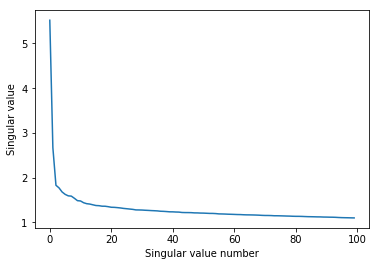

In [91]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

I dont think we need more than 20

In [92]:
words_compressed, _, docs_compressed = svds(my_mat, k=20)
docs_compressed = docs_compressed.transpose()

In [93]:
word_to_index = tfidf_vec2.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(5169, 20)


In [94]:
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [95]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [96]:
word_to_index.keys()

dict_keys(['breathe', 'period', 'europe', 'messages', 'war', 'load', 'withdraw', 'sought', 'follow', 'sad', 'catholic', 'note', 'civil', 'recalled', 'covered', 'daring', 'renewal', 'network', 'green', 'corpse', 'cut', 'prison', 'views', 'reacted', 'enormous', 'victims', 'instance', 'solo', 'mechanical', 'sees', 'belonged', '2015', 'masses', 'publications', 'stands', 'dancers', '1991', 'understand', 'agrees', 'schools', 'veterans', 'children', 'bennett', 'remove', 'writer', 'renewed', 'refugees', 'tv', 'captivating', 'won', 'lee', 'songwriter', 'operation', 'works', 'delight', 'quirky', 'eclipsed', 'movies', 'singles', 'marks', 'looked', 'dawn', 'actor', 'artificial', 'tables', 'interview', 'manifested', 'typical', 'unusual', 'rejected', 'drug', 'confused', 'food', 'theatergoers', 'artsy', 'muddy', 'leather', 'noting', 'doubts', 'angeles', 'dramas', 'themes', 'resonate', 'speak', 'filmed', 'format', 'biggest', 'soft', 'phenomenal', 'clumsy', 'importance', 'skinned', 'australian', 'profi

In [97]:
closest_words("witty")

[('faces', 0.7301512200272899),
 ('charming', 0.6919905260693526),
 ('gentlemen', 0.6792358889751737),
 ('simplicity', 0.65421695864944),
 ('ill', 0.6459522264568263),
 ('bored', 0.6406719428974113),
 ('ran', 0.6374284585606613),
 ('getting', 0.6349879121652394),
 ('nicholaw', 0.617931599168863),
 ('gains', 0.6041199984754099)]

In [98]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [99]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
# subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(473, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 473 samples in 0.004s...
[t-SNE] Computed neighbors for 473 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 473 / 473
[t-SNE] Mean sigma: 0.077129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.167114
[t-SNE] KL divergence after 1000 iterations: 1.130611
(473, 2)


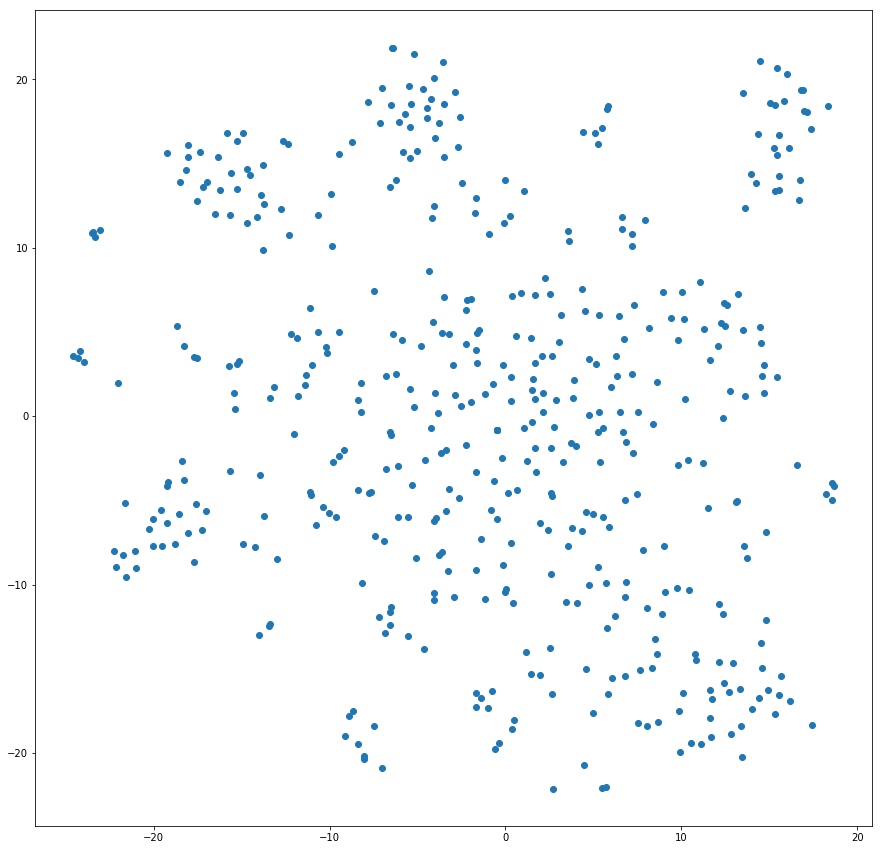

In [100]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [101]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(lyrics.keys())[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [102]:
for i in range(10):
    print(list(lyrics.keys())[i])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Class Act, A
Bajour:0.683
Big River:0.663
Bombay Dreams:0.660
Barnum:0.619
Baker's Wife, The:0.609

Jekyll & Hyde
Wicked:0.807
Kismet:0.771
Narnia:0.716
Sweeney Todd: The Demon Barber of Fleet :0.683
Cinderella: Songs from the Classic Fairy:0.662

Mary Poppins
Matilda:0.833
Priscilla: Queen of the Desert:0.730
Motown:0.710
Most Happy Fella, The:0.670
Raisin:0.625

Secret Garden, The
Passing Strange:0.704
You're a Good Man, Charlie Brown:0.698
Pacific Overtures:0.682
Once On This Island:0.682
We Will Rock You:0.677

Miss Liberty
Little Women:0.795
Mack & Mabel:0.762
Merrily We Roll Along:0.760
Rooms: A Rock Romance:0.751
Seesaw:0.730

Love Never Dies
Phantom of the Opera, The:0.787
Evita:0.764
LoveMusik:0.754
Andrew Lloyd Webber Divas:0.730
Tell Me On A Sunday:0.680

Very Potter Sequel, A
Very Potter, A:0.921
Marvelous Wonderettes, The:0.676
13:0.645
Seussical:0.641
Shrek:0.623

American in Paris, An
Chicago:0.723
Best Little Whorehouse in Texas, The:0.659
Pirate Queen, The:0.635
Catch 

In [103]:
CP = np.zeros([len(lyrics),len(lyrics)])
for i in range(len(lyrics)):
    for title, score in closest_projects(i,len(lyrics)):
        index = musical_name_to_index[title]
        CP[index,i] = score
np.fill_diagonal(CP,1)

In [104]:
CP

array([[ 1.00000000e+00,  2.22057189e-01,  2.08706755e-01, ...,
         5.43031518e-01,  1.19309081e-01,  5.45238768e-02],
       [ 2.22057189e-01,  1.00000000e+00,  2.49800475e-01, ...,
        -2.31555707e-01,  2.94424149e-01, -8.98397716e-02],
       [ 2.08706755e-01,  2.49800475e-01,  1.00000000e+00, ...,
        -2.01339644e-01, -7.66012695e-04, -1.34647876e-01],
       ...,
       [ 5.43031518e-01, -2.31555707e-01, -2.01339644e-01, ...,
         1.00000000e+00, -7.04268021e-02,  2.26299338e-01],
       [ 1.19309081e-01,  2.94424149e-01, -7.66012695e-04, ...,
        -7.04268021e-02,  1.00000000e+00,  4.24454155e-01],
       [ 5.45238768e-02, -8.98397716e-02, -1.34647876e-01, ...,
         2.26299338e-01,  4.24454155e-01,  1.00000000e+00]])

In [105]:
CP[3,4]

-0.053088111419271264

In [106]:
tfidf_vec3 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 10, norm = "l2")
my_mat2 = tfidf_vec.fit_transform([d[i] for i in d]).transpose()

In [107]:
u, s, v_trans = svds(my_mat2, k=100)

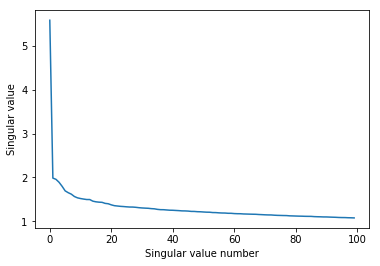

In [108]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [109]:
words_compressed, _, docs_compressed = svds(my_mat, k=20)
docs_compressed = docs_compressed.transpose()

In [110]:
word_to_index = tfidf_vec2.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(5169, 20)


In [111]:
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [112]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [113]:
word_to_index.keys()

dict_keys(['breathe', 'period', 'europe', 'messages', 'war', 'load', 'withdraw', 'sought', 'follow', 'sad', 'catholic', 'note', 'civil', 'recalled', 'covered', 'daring', 'renewal', 'network', 'green', 'corpse', 'cut', 'prison', 'views', 'reacted', 'enormous', 'victims', 'instance', 'solo', 'mechanical', 'sees', 'belonged', '2015', 'masses', 'publications', 'stands', 'dancers', '1991', 'understand', 'agrees', 'schools', 'veterans', 'children', 'bennett', 'remove', 'writer', 'renewed', 'refugees', 'tv', 'captivating', 'won', 'lee', 'songwriter', 'operation', 'works', 'delight', 'quirky', 'eclipsed', 'movies', 'singles', 'marks', 'looked', 'dawn', 'actor', 'artificial', 'tables', 'interview', 'manifested', 'typical', 'unusual', 'rejected', 'drug', 'confused', 'food', 'theatergoers', 'artsy', 'muddy', 'leather', 'noting', 'doubts', 'angeles', 'dramas', 'themes', 'resonate', 'speak', 'filmed', 'format', 'biggest', 'soft', 'phenomenal', 'clumsy', 'importance', 'skinned', 'australian', 'profi

In [114]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [115]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
# subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(473, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 473 samples in 0.004s...
[t-SNE] Computed neighbors for 473 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 473 / 473
[t-SNE] Mean sigma: 0.077129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.781868
[t-SNE] KL divergence after 1000 iterations: 1.155602
(473, 2)


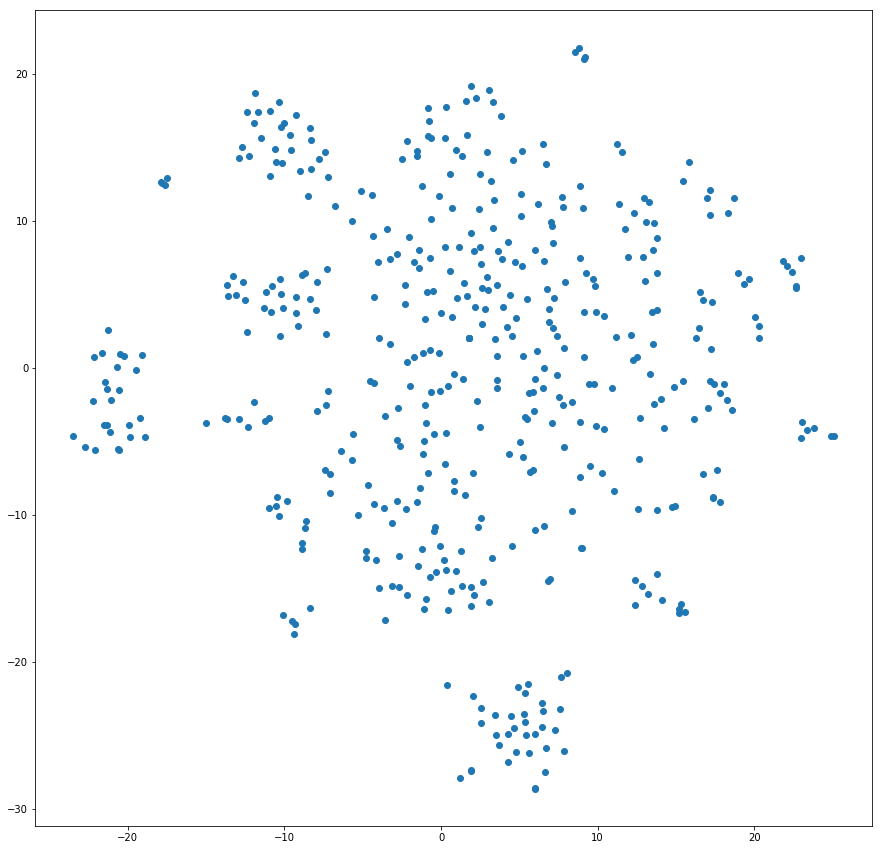

In [116]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [117]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(lyrics.keys())[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [118]:
for i in range(10):
    print(list(lyrics.keys())[i])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Class Act, A
Bajour:0.683
Big River:0.663
Bombay Dreams:0.660
Barnum:0.619
Baker's Wife, The:0.609

Jekyll & Hyde
Wicked:0.807
Kismet:0.771
Narnia:0.716
Sweeney Todd: The Demon Barber of Fleet :0.683
Cinderella: Songs from the Classic Fairy:0.662

Mary Poppins
Matilda:0.833
Priscilla: Queen of the Desert:0.730
Motown:0.710
Most Happy Fella, The:0.670
Raisin:0.625

Secret Garden, The
Passing Strange:0.704
You're a Good Man, Charlie Brown:0.698
Pacific Overtures:0.682
Once On This Island:0.682
We Will Rock You:0.677

Miss Liberty
Little Women:0.795
Mack & Mabel:0.762
Merrily We Roll Along:0.760
Rooms: A Rock Romance:0.751
Seesaw:0.730

Love Never Dies
Phantom of the Opera, The:0.787
Evita:0.764
LoveMusik:0.754
Andrew Lloyd Webber Divas:0.730
Tell Me On A Sunday:0.680

Very Potter Sequel, A
Very Potter, A:0.921
Marvelous Wonderettes, The:0.676
13:0.645
Seussical:0.641
Shrek:0.623

American in Paris, An
Chicago:0.723
Best Little Whorehouse in Texas, The:0.659
Pirate Queen, The:0.635
Catch 

In [119]:
CP2 = np.zeros([len(lyrics),len(lyrics)])
for i in range(len(lyrics)):
    for title, score in closest_projects(i,len(lyrics)):
        index = musical_name_to_index[title]
        CP2[index,i] = score
np.fill_diagonal(CP2,1)

In [120]:
CP2

array([[ 1.00000000e+00,  2.22057189e-01,  2.08706755e-01, ...,
         5.43031518e-01,  1.19309081e-01,  5.45238768e-02],
       [ 2.22057189e-01,  1.00000000e+00,  2.49800475e-01, ...,
        -2.31555707e-01,  2.94424149e-01, -8.98397716e-02],
       [ 2.08706755e-01,  2.49800475e-01,  1.00000000e+00, ...,
        -2.01339644e-01, -7.66012695e-04, -1.34647876e-01],
       ...,
       [ 5.43031518e-01, -2.31555707e-01, -2.01339644e-01, ...,
         1.00000000e+00, -7.04268021e-02,  2.26299338e-01],
       [ 1.19309081e-01,  2.94424149e-01, -7.66012695e-04, ...,
        -7.04268021e-02,  1.00000000e+00,  4.24454155e-01],
       [ 5.45238768e-02, -8.98397716e-02, -1.34647876e-01, ...,
         2.26299338e-01,  4.24454155e-01,  1.00000000e+00]])

In [123]:
import pandas
reviews = pandas.read_csv("reviews_v7.csv",sep=",",encoding = "latin1")
mydict = reviews.to_dict('index')

In [124]:
reviews

,Name,Reviews,Adjectives
0,In a Pickle,"['""Loopy, lovely and almost impossibly good-hu...",[]
1,Distorted Diznee,"['Amazing drag show at Laurie Beechman', ""4 of...","['Enchanting, Entertaining, Funny, Great singi..."
2,On the Exhale,"['""Marin Ireland is armed only with MartÌ_n Zi...","['Smart, Relevant, Profound, Great acting, Mus..."
3,Edgar Allan,"['""A perfect piece of dark comedy...By turns a...","['Clever, Great acting, Great singing, Charmin..."
4,"Kiss Me, Kate","['""ItÛªs smashing. The production has gained ...","['Great staging, Riveting, Refreshing, Absorbi..."
5,The Unusual Tale of Mary &amp; Jos...,"['""The songs never reach anything preachy, rat...","['Cliched, Entertaining, Indulgent, Relevant, ..."
6,The Boy Who Danced On Air,"['""A challenging, courageous, and beautiful ne...","['Clever, Enchanting, Delightful, Masterful, P..."
7,Inner Voices 2018,"[""ÛÏDifficult-to-sing but powerfully expressi...","['Heartfelt, Great acting, Absorbing, Intellig..."
8,Real Men: The Musical,"['""With \'The Real Men: The Musical,\' the tit...","['Clever, Funny, Great acting, Entertaining', ..."
9,Ordinary Days,['ÛÏA show that sneaks up on you and captures...,"['Clever, Delightful, Funny, Great acting', 'N..."


In [125]:
showscore = {}
for i in mydict:
    showscore[mydict[i]["Name"]] = {"Adjectives":mydict[i]["Adjectives"],"Reviews":mydict[i]["Reviews"]}

In [126]:
showscore.keys()

dict_keys(['Cross That River', 'Sleepy Hollow', 'Votes', 'The Wrong Box', 'The Wild Party', 'The Offending Gesture', 'Freestyle Love Supreme', 'Red Roses, Green Gold', 'Real Men: The Musical', 'The View UpStairs', 'Home for the Holidays', 'Godspell', 'Fallen Skies', 'Avenue Q', 'Nunsense', 'The Time Machine', 'The Golden Bride', 'Mame', 'Himself and Nora', 'Life is for Living: Conversati...', 'At the Crossroads: Music for F...', 'Return to Spoon River', 'Christmas in Hell', 'Hoi Polloi', 'Yaki Yim Bamboo: The Musical', 'Friends! The Musical Parody', 'Be More Chill', 'Red Devil Moon', 'Lula Del Ray', '42nd Street', 'Maestro', 'ELF The Musical', "You're a Good Man, Charlie Bro...", 'A Christmas Carol - A New Musical', "Pirate Pete's Parrot", 'Kid Victory', 'Du Barry Was a Lady', 'Southern Comfort', 'As You Like It', 'Death for Five Voices', "Dr. Seuss' How the Grinch Stol...", 'Tribulation: The Musical', 'Here I Sit, Broken Hearted\x89Û_A B...', 'Frozen the Musical', 'Happy Karaoke Fun T

In [127]:
#bd is lyrics
#showscore is reviews
with open('proper_to_backend.json', 'r') as JSON:
    good_names = json.load(JSON)
new_showscore = dict(showscore)

In [128]:
for s in new_showscore:
    if "&" in s and s not in ["Song &amp; Dance", "Mack &amp; Mabel", "Jekyll &amp; Hyde"]:
        new_key = s[:s.index("&amp;")] + "and" + s[s.index("&amp;")+5:]
        showscore[new_key] = showscore.pop(s)

In [129]:
for key in showscore.keys():
    if "..." in key:
        #in_bd = False
        for bd_key in good_names.keys():
            if key[:key.index('...')].lower() in bd_key.lower():
                new_showscore[bd_key] = new_showscore.pop(key)
                #in_bd = True
                print(key)

You're a Good Man, Charlie Bro...
On a Clear Day You Can See For...
Sunday in the Park with George...
A Funny Thing Happened on the ...
Charlie and The Chocolate Fact...
Sweeney Todd: The Demon Barber...


In [130]:
overlap = []
not_in = []
for show_key in new_showscore.keys():
    if show_key.lower() in [g.lower() for g in good_names.keys()]:
        overlap.append(show_key)
    else:
        not_in.append(show_key)

In [137]:
for i in new_showscore:
    if "Ain't Too Proud" in i:
        print(i)

Ain't Too Proud ÛÒ The Life and...


In [142]:
name_corrections = {
    "A Bronx Tale":"Bronx Tale",
    "Beauty and the Beast":"Disney's Beauty And The Beast",
    "Billy Elliot: The Musical":"Billy Elliot",
    "Cinderella":"Cinderella: Songs from the Classic Fairy Tale",
    "Frankenstein the Musical":"Frankenstein: A New Musical",
    "Frozen the Musical":"Frozen",
    "Grand Hotel, The Musical":"Grand Hotel",
    "Groundhog Day The Musical":"Groundhog Day",
    "Hello, Dolly!":"Hello, Dolly",
    "Motown: The Musical":"Motown",
    "Oklahoma!":"Oklahoma",
    #"Oliver!":"Oliver",
    "Pretty Woman: The Musical":"Pretty Woman",
    "School of Rock - The Musical":"School of Rock",
    "Snow White":"Snow White And The Seven Dwarfs",
    "The Lion King":"Lion King",
    "The Little Mermaid":"Little Mermaid",
    "The Prom":"Prom",
    "The Wild Party":"Wild Party",
    "Urinetown: The Musical":"Urinetown",
    "[title of show]":"Title Of Show",
    "Beautiful: The Carole King Mus...":"Beautiful: The Carole King",
    "Ain't Too Proud ÛÒ The Life and...":"Ain't Too Proud",
    "Christmas Spectacular Starring...":"Radio City Christmas Spectacular",
    "Tick, Tick ... Boom!":"Tick, Tick... Boom",
    "La Cage aux Folles":"La Cage Aux Folles",
    "Rock of Ages":"Rock Of Ages",
    "In The Heights":"In the Heights",
    "Do I Hear a Waltz?":"Do I Hear A Waltz?",
    "Bells are Ringing":"Bells Are Ringing",
    "Once Upon a Mattress":"Once Upon A Mattress",
    "Subways are for Sleeping":"Subways Are for Sleeping",
    "The Wizard of Oz":"The Wizard Of Oz",
    "Milk and Honey":"Milk And Honey",
    "Hedwig and the Angry Inch":"Hedwig And The Angry Inch",
    "Fiddler On The Roof":"Fiddler on the Roof",
    "Songs for a New World":"Songs For A New World",
    "Into The Woods":"Into the Woods",
    "The Boys from Syracuse":"The Boys From Syracuse"
}

In [143]:
for i in name_corrections:
    if i not in new_showscore:
        print(i)

In [144]:
for old_name in name_corrections.keys():
    new_showscore[name_corrections[old_name]] = new_showscore.pop(old_name)

In [145]:
new_showscore.keys()

dict_keys(['Votes', 'Evita', 'Avenue Q', 'Nunsense', 'Life is for Living: Conversati...', 'Mark Felt, Superstar', 'Yaki Yim Bamboo: The Musical', '42nd Street', 'ELF The Musical', 'A Ride on the Irish Cream', 'Kid Victory', 'Southern Comfort', 'As You Like It', 'It Shoulda Been You', 'Cinderella: Songs from the Classic Fairy Tale', 'Death for Five Voices', 'Tribulation: The Musical', 'Do I Hear A Waltz?', 'Happy Karaoke Fun Time', 'Red Emma &amp; The Mad Monk', 'School of Rock', 'Once Upon A Mattress', 'Sunset Boulevard', "Pamela's First Musical", 'The Fantasticks', 'Honeymoon in Vegas', 'Bastard Jones', 'Love, Linda: The Life of Mrs. ...', 'Frozen', 'Calamity Jane', 'Great Frontier: A Poorly Resea...', 'No Exit', 'Les Miserables', 'Edgar Allan', 'R.R.R.E.D.', 'KPOP', 'Addy &amp; Uno', 'The Eleventh Hour', 'The King and I', 'A Harlem Christmas Carol', 'Nuclear Follies', 'The Lion', 'Grand Hotel', 'Miss Blanche Tells It All', 'Best Life', 'Interview: A New Musical', 'Jerry Springer \x89

In [148]:
for rev in new_showscore.values():
    print(rev["Reviews"])
    break

['"This production offers many laughs as well as entertaining momentsÛ_Under KurlanderÛªs intricate direction, \'Votes\' presents a moving and personal picture of the real lives and feelings of an extremely powerful couple in AmericaÛ_The chemistry between Wright-Mathew and Miller is thrilling to witnessÛ_\'Votes\' will give audiences something to smile about...Entertaining, whimsical, and smart, \'Votes\' is just the ticket." ', '"Tired of the parody that is our current political situation? Chill, take a deep breath, and amble over to see \'Votes,\' a musical about the Clintons purporting to show how they arrived where they are and what was lost along the way...This is a lighthearted look at a dark landscape but although it pulls no punches, itÛªs neither mean nor preachy...IÛªll not divulge the dÌ©noument; suffice it to say it takes a different tone, more fable or morality tale than the acerbic plain talk that led up to it." ', '"There is no real character development, no under

In [149]:
rev_list = []
for rev in new_showscore.values():
    rev_list.append(rev["Reviews"])

In [150]:
tfidf_vec4 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
doc_by_vocab4 = tfidf_vec4.fit_transform([i for i in rev_list]).transpose()
index_to_vocab4 = {i:v for i, v in enumerate(tfidf_vec4.get_feature_names())}

In [151]:
u4, s4, v_t4 = svds(doc_by_vocab4, k=100)

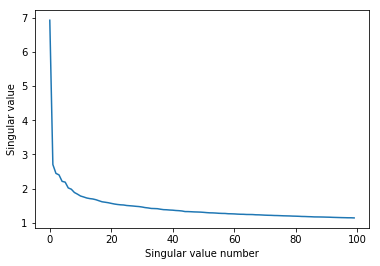

In [152]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s4[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [153]:
words_comp4, _, docs_comp4 = svds(doc_by_vocab4, k = 40)
docs_comp4 = docs_comp4.transpose()

In [154]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose = 1)

In [155]:
subset = docs_comp4[:4500,:]
proj_docs = tsne.fit_transform(subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 599 samples in 0.004s...
[t-SNE] Computed neighbors for 599 samples in 0.168s...
[t-SNE] Computed conditional probabilities for sample 599 / 599
[t-SNE] Mean sigma: 0.086032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.158867
[t-SNE] KL divergence after 1000 iterations: 1.281618


In [159]:
from sklearn.preprocessing import normalize

docs_comp4 = normalize(docs_comp4, axis = 1)
def closest_docs(doc_index_in, k = 5):
    sims = docs_comp4.dot(docs_comp4[doc_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(new_showscore.keys())[i], sims[i]/sims[asort[0]]) for i in asort[1:]]

In [164]:
closest_docs(28, k = len(new_showscore))

[('Aladdin', 0.9317943291709636),
 ('Little Mermaid', 0.9143527709044204),
 ('Disenchanted', 0.8420561152386873),
 ("Disney's Beauty And The Beast", 0.7370065098555515),
 ('The Lion', 0.6182658893984876),
 ('Distorted Diznee', 0.5250481937593343),
 ('Anastasia', 0.49016107231346057),
 ('Lion King', 0.44815536168673265),
 ('Wicked Frozen', 0.4429424295923038),
 ('Gigi', 0.39545715085556693),
 ('Bronx Tale', 0.38954118492770495),
 ('Finding Neverland', 0.32231142689918735),
 ('The Fourth Messenger', 0.30836187085082456),
 ('Pretty Woman', 0.29849615678934094),
 ('Tuck Everlasting', 0.27042660613876834),
 ('Amelie', 0.26388004074454885),
 ('Matilda', 0.26346381526905405),
 ('Les Miserables', 0.25193807509567473),
 ('Beetlejuice ', 0.2415510790527251),
 ('Amazing Grace', 0.24150866527820475),
 ('Charlie and the Chocolate Factory', 0.2374410380365885),
 ('Groundhog Day', 0.23333161088850368),
 ('Mean Girls', 0.2325249891124846),
 ('Pillars of New York', 0.2296923264780088),
 ('Showgirls! Th

In [163]:
list(new_showscore.keys()).index("Frozen")

28

In [168]:
rev_sim = {}
for mus in new_showscore:
    i = list(new_showscore.keys()).index(mus)
    rev_sim[mus] = closest_docs(i, k = len(new_showscore))

In [169]:
rev_sim["Lion King"]

[('King Kong', 0.8972505461052738),
 ('Beautiful: The Carole King', 0.7698240084805942),
 ('The King and I', 0.6706851060882304),
 ('Symphonie Fantastique', 0.511645663582787),
 ('Unfolding', 0.46071250616542947),
 ('Fiddler on the Roof', 0.4544368470289166),
 ('The Lion', 0.4513993387947252),
 ('Aladdin', 0.45049045107629326),
 ('Frozen', 0.44815536168673287),
 ('Made in China', 0.43667610244201915),
 ("Calderon's Two Dreams", 0.4217528045517247),
 ('New York Spectacular', 0.399461192629208),
 ('Duke Oldrich &amp; Washerwoman Boz...', 0.3967527926804761),
 ('Oklahoma', 0.3955087428138882),
 ('Sincerely, Oscar', 0.38196725353849514),
 ('Really Rosie', 0.3787015691517083),
 ('Beetlejuice', 0.36120326779167083),
 ('Little Mermaid', 0.3577014712893888),
 ('My Fair Lady', 0.3432782658611133),
 ('Lula Del Ray', 0.33563243597996684),
 ('Shadows: A Dance Musical', 0.33120570096440116),
 ('Disenchanted', 0.32711671006192533),
 ('Matilda', 0.32125918798486897),
 ('Carousel', 0.3133265022701582)

In [206]:
revsims_M = np.zeros([len(lyrics),len(lyrics)])
for mus in rev_sim:
    if mus in good_names:
        mus_backend = good_names[mus]
        if mus_backend in musical_name_to_index:
            i = musical_name_to_index[mus_backend]
            for name,score in rev_sim[mus]:
                if name in good_names:
                    name_backend = good_names[name]
                    if name_backend in musical_name_to_index.keys():
                        j = musical_name_to_index[name_backend]
                        revsims_M[i,j] = score
np.fill_diagonal(revsims_M,1)
        

In [207]:
revsims_M

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [186]:
new_showscore.keys()

dict_keys(['Votes', 'Evita', 'Avenue Q', 'Nunsense', 'Life is for Living: Conversati...', 'Mark Felt, Superstar', 'Yaki Yim Bamboo: The Musical', '42nd Street', 'ELF The Musical', 'A Ride on the Irish Cream', 'Kid Victory', 'Southern Comfort', 'As You Like It', 'It Shoulda Been You', 'Cinderella: Songs from the Classic Fairy Tale', 'Death for Five Voices', 'Tribulation: The Musical', 'Do I Hear A Waltz?', 'Happy Karaoke Fun Time', 'Red Emma &amp; The Mad Monk', 'School of Rock', 'Once Upon A Mattress', 'Sunset Boulevard', "Pamela's First Musical", 'The Fantasticks', 'Honeymoon in Vegas', 'Bastard Jones', 'Love, Linda: The Life of Mrs. ...', 'Frozen', 'Calamity Jane', 'Great Frontier: A Poorly Resea...', 'No Exit', 'Les Miserables', 'Edgar Allan', 'R.R.R.E.D.', 'KPOP', 'Addy &amp; Uno', 'The Eleventh Hour', 'The King and I', 'A Harlem Christmas Carol', 'Nuclear Follies', 'The Lion', 'Grand Hotel', 'Miss Blanche Tells It All', 'Best Life', 'Interview: A New Musical', 'Jerry Springer \x89

In [194]:
musical_name_to_index["Wizard Of Oz, The"]

105

In [208]:
cosmat[np.isnan(cosmat)] = 0

In [209]:
np.savetxt("sim_matrix.csv",cosmat,delimiter=",") #saving the similarity matrix

In [210]:
json1 = json.dumps(musical_name_to_index) #saving name to index dictionary
f = open("name_to_index.json","w")
f.write(json1)
f.close()
json2 = json.dumps(musical_index_to_name) #saving index to name dictionary
f = open("index_to_name.json","w")
f.write(json2)
f.close()

In [211]:
np.savetxt("composer_sim.csv",compM,delimiter=",") #saving the composer similarity

In [212]:
np.savetxt("SVM_sim.csv",CP,delimiter=",") #saving the similarity from the SVM stuff

In [213]:
json3 = json.dumps(rev_sim)
f = open("review_sim.json","w")
f.write(json3)
f.close()


In [214]:
np.savetxt("review_sim",revsims_M,delimiter=",") #saving the reviews similaritys